### <font color=Green>**Author: Zeinab ShahSafdari**</font>

### <font color=Blue>**Course: IBM Exploratory Data Analysis for Machine Learning**</font>

### <font color=Orange>**Final Project: Data Analysis on FIFA19 dataset**</font>

# **-----------------------------------------------------------------------**

## <font color=Red> 1. Brief description of the dataset and a summary of the attributes </font>


This dataset contains FIFA19 data, a football simulation video game. Personal data and IDs of players along with playing style and statistics are available in this dataset. 

To be more specific, the content of this dataset is listed below:

### **18 attributes:**

- ID and Name of each player featuring in FIFA19
- Players' Personal data including Age, Hight, weight, Nationality, Wage and Club, 
- Players' Date Joined, Value, Contract Valid Until and Release Clause 
- Potential, Playing Position, Preferred Foot, International Reputation, Skill Moves and overall 



It's a fun dataset, Let's Go!✌️😊⚽️

---

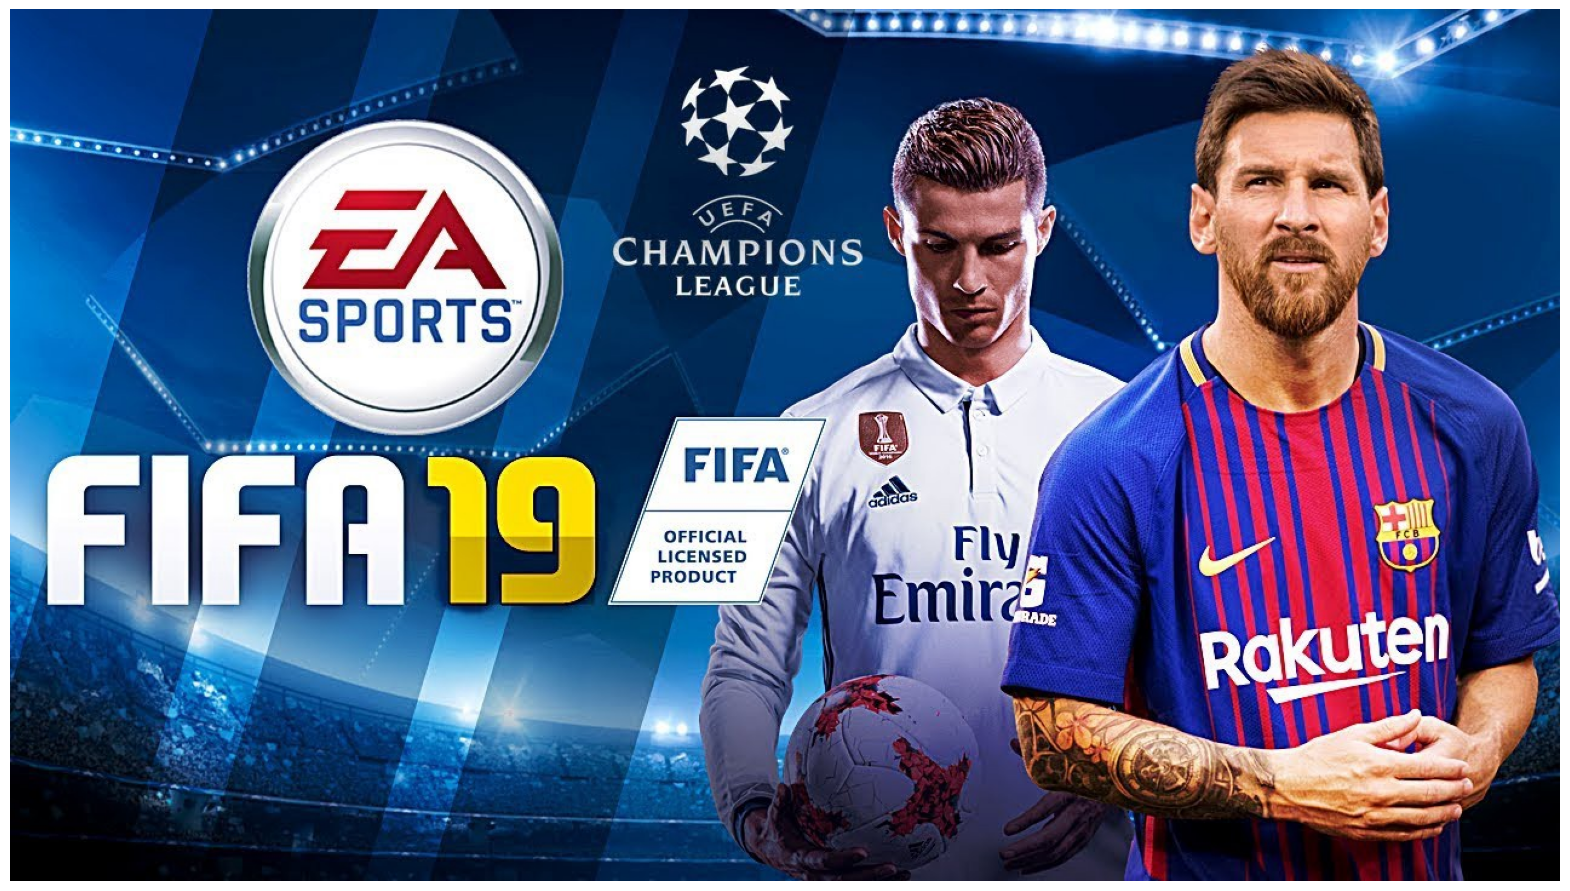

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (20, 15))
_img = plt.imread(r"C:\Users\Zeinab\Desktop\Exploratory Data Analysis\IBM_Course_Project\FIFA2019.jpeg")
ax.imshow(_img)
ax.axis("off")
plt.show()

## <font color=Red> 2. Initial plan for data exploration </font>

### Required Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Read Datasheet

In [6]:
data = pd.read_csv(r"C:\Users\Zeinab\Desktop\Exploratory Data Analysis\IBM_Course_Project\fifa19.csv")
data.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [8]:
print("Number of rows: " + str(data.shape[0]))
print(23*"-")
print("Number of Columns: " + str(data.shape[1]))
print(127*"-")
print("Column names: " + str(data.columns.tolist()))
print(127*"-")

Number of rows: 18207
-----------------------
Number of Columns: 18
-------------------------------------------------------------------------------------------------------------------------------
Column names: ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']
-------------------------------------------------------------------------------------------------------------------------------


## <font color=Red> 3. Actions taken for data cleaning and feature engineering </font>

### <font color=Red> 3.1. Data Cleaning </font>

### Data Info

In [9]:
print("Dataset information: \n" + str(data.info()))
print(127*"-")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

### Checking for null values

In [10]:
print("Number of missing Values: \n" + str(data.isnull().sum()))
print(127*"-")

Number of missing Values: 
ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64
-------------------------------------------------------------------------------------------------------------------------------


### Calculating the percentage of null values

In [11]:
print((data.isnull().sum()/len(data.index))*100)
print(127*"-")

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       1.384083
Wage                        0.000000
Preferred Foot              0.000000
International Reputation    0.263635
Skill Moves                 0.263635
Position                    0.000000
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.000000
Release Clause              0.000000
dtype: float64
-------------------------------------------------------------------------------------------------------------------------------


- ### *Inference*:
    5 out of 18 columns have missing data which is almost a moderate amount. 
    The percentage of missing values is below 2%.
    
- ### *Option*:
    Based on the nature of the data, since the percentage of all missing values is below 50, 
    we can remove these rows instead of removing the whole columns. 
    

### Removing null values and checking again

In [12]:
df = data.dropna()
print(df.isna().sum())
print(47*"-")

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64
-----------------------------------------------


### Naw shape

In [13]:
print(df.shape)
print(23*"-")
print("Number of rows: " + str(df.shape[0]))
print(23*"-")
print("Number of Columns: " + str(df.shape[1]))
print(23*"-")

(17907, 18)
-----------------------
Number of rows: 17907
-----------------------
Number of Columns: 18
-----------------------


### Getting some sample of the new dataset

In [14]:
df.sample(10)

ID           Name  Age       Nationality  Overall  Potential  \
9156   215380       G. Milan   30         Argentina       66         66   
17098  240968    R. McGinley   18  Northern Ireland       55         68   
2992   204447     F. Lucioni   30             Italy       73         73   
2701   235565       D. Bronn   23           Tunisia       73         80   
792    212977       N. Stark   23           Germany       78         84   
10827  196316     B. Maubleu   28            France       65         67   
10501  237708       M. Sylla   18            France       65         84   
2681   202276      S. Zoller   27           Germany       73         73   
14090  225586     B. Kennedy   21  Northern Ireland       61         69   
5555   198117  A. Bernardini   31             Italy       70         70   

                              Club    Value  Wage Preferred Foot  \
9156   Tiburones Rojos de Veracruz    475.0   3.0          Right   
17098             Rotherham United    160.0   2.0          Right   
2992                         Lecce   3000.0   4.0          Right   
2701                      KAA Gent   4800.0  14.0          Right   
792                     Hertha BSC  12000.0  24.0          Right   
10827             Grenoble Foot 38    450.0   2.0          Right   
10501                    AS Monaco   1100.0   8.0          Right   
2681                    1. FC Köln   4300.0  19.0          Right   
14090                    Stevenage    375.0   2.0           Left   
5555           US Salernitana 1919   1200.0   3.0          Right   

       International Reputation  Skill Moves Position  Joined  \
9156                        1.0          2.0       CB    2017   
17098                       1.0          2.0       LM    2018   
2992                        1.0          2.0      RCB    2018   
2701                        1.0          3.0      LCB    2017   
792                         1.0          2.0       CB    2015   
10827                       1.0          1.0       GK    2014   
10501                       1.0          3.0       ST    2018   
2681                        1.0          3.0       ST    2014   
14090                       1.0          3.0       RM    2014   
5555                        1.0          2.0       CB    2015   

      Contract Valid Until    Height  Weight  Release Clause  
9156            2019-01-01  6.333333   203.0           784.0  
17098           2019-01-01  5.750000   143.0           396.0  
2992            2021-01-01  6.083333   176.0          4600.0  
2701            2021-01-01  6.000000   165.0          8200.0  
792             2022-01-01  6.250000   179.0         22800.0  
10827           2022-01-01  6.333333   183.0           821.0  
10501           2020-01-01  5.916667   154.0          2800.0  
2681            2020-01-01  5.833333   154.0          6400.0  
14090           2020-01-01  5.833333   154.0           731.0  
5555            2022-01-01  6.250000   161.0          1900.0

### <font color=Red> 3.2. Feature Engineering </font>
### adding another feature: Year_of_birth

In [15]:
current_year = 2018
year = []
for i in df["Age"]:
    x = current_year - i
    year.append(x)   
df = df.assign(Year_of_birth = year)
df

ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club     Value   Wage Preferred Foot  \
0             FC Barcelona  110500.0  565.0           Left   
1                 Juventus   77000.0  405.0          Right   
2      Paris Saint-Germain  118500.0  290.0          Right   
3        Manchester United   72000.0  260.0          Right   
4          Manchester City  102000.0  355.0          Right   
...                    ...       ...    ...            ...   
18202      Crewe Alexandra      60.0    1.0          Right   
18203       Trelleborgs FF      60.0    1.0          Right   
18204     Cambridge United      60.0    1.0          Right   
18205      Tranmere Rovers      60.0    1.0          Right   
18206      Tranmere Rovers      60.0    1.0          Right   

       International Reputation  Skill Moves Position  Joined  \
0                           5.0          4.0       RF    2004   
1                           5.0          5.0       ST    2018   
2                           5.0          5.0       LW    2017   
3                           4.0          1.0       GK    2011   
4                           4.0          4.0      RCM    2015   
...                         ...          ...      ...     ...   
18202                       1.0          2.0       CM    2017   
18203                       1.0          2.0       ST    2018   
18204                       1.0          2.0       ST    2017   
18205                       1.0          2.0       RW    2018   
18206                       1.0          2.0       CM    2018   

      Contract Valid Until    Height  Weight  Release Clause  Year_of_birth  
0               2021-01-01  5.583333   159.0        226500.0           1987  
1               2022-01-01  6.166667   183.0        127100.0           1985  
2               2022-01-01  5.750000   150.0        228100.0           1992  
3               2020-01-01  6.333333   168.0        138600.0           1991  
4               2023-01-01  5.916667   154.0        196400.0           1991  
...                    ...       ...     ...             ...            ...  
18202           2019-01-01  5.750000   134.0           143.0           1999  
18203           2020-01-01  6.250000   170.0           113.0           1999  
18204           2021-01-01  5.666667   148.0           165.0           2002  
18205           2019-01-01  5.833333   154.0           143.0           2001  
18206           2019-01-01  5.833333   176.0           165.0           2002  

[17907 rows x 19 columns]

## <font color=Red> 4. Key Findings and Insights </font>

### Value

In [16]:
pd.options.display.float_format = "{:.2f}".format
print(df["Value"].describe())
print(27*"-")

count    17907.00
mean      2450.13
std       5633.21
min         10.00
25%        325.00
50%        700.00
75%       2100.00
max     118500.00
Name: Value, dtype: float64
---------------------------


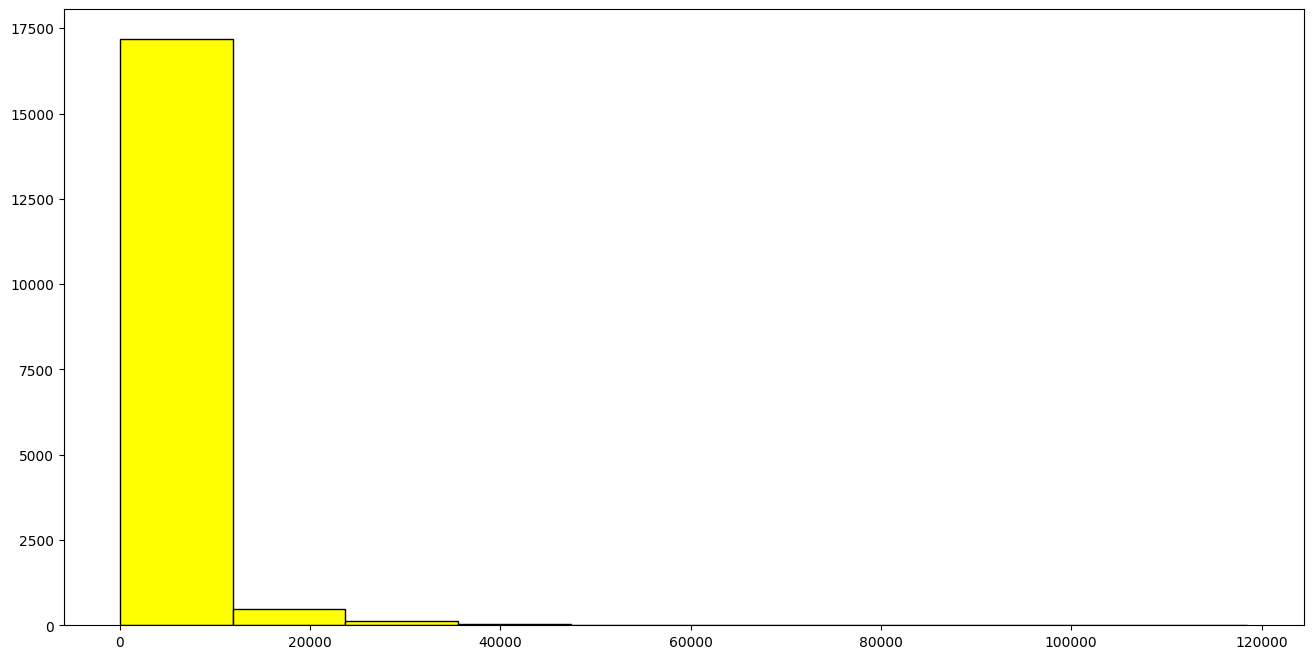

Therefore, the Value of the most of the players is almost below 15000
----------------------------------------------------------------------


In [17]:
plt.figure(figsize=(16,8))
plt.hist(df["Value"], color="yellow", edgecolor="black")
plt.show()
print("Therefore, the Value of the most of the players is almost below 15000")
print(70*"-")

### Skill Moves

In [18]:
pd.options.display.float_format = "{:.2f}".format
print(df["Skill Moves"].describe())
print(47*"-")

count   17907.00
mean        2.36
std         0.76
min         1.00
25%         2.00
50%         2.00
75%         3.00
max         5.00
Name: Skill Moves, dtype: float64
-----------------------------------------------


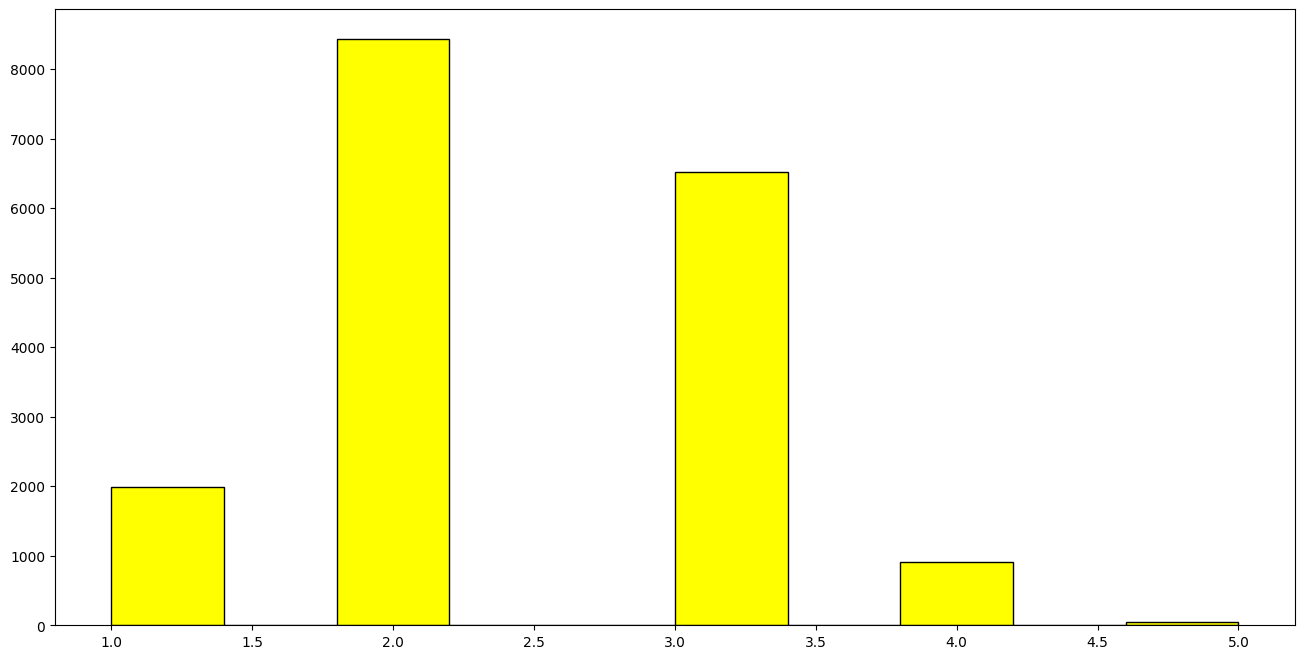

Therefore, the score of Skill Moves for most of the players is around 2
----------------------------------------------------------------------


In [19]:
plt.figure(figsize=(16,8))
plt.hist(df["Skill Moves"], color="yellow", edgecolor="black")
plt.show()
print("Therefore, the score of Skill Moves for most of the players is around 2")
print(70*"-")

### Contract Valid Until

In [20]:
pd.options.display.float_format = "{:.2f}".format
print(df["Contract Valid Until"].describe())
print(47*"-")

count          17907
unique            35
top       2019-01-01
freq            4865
Name: Contract Valid Until, dtype: object
-----------------------------------------------


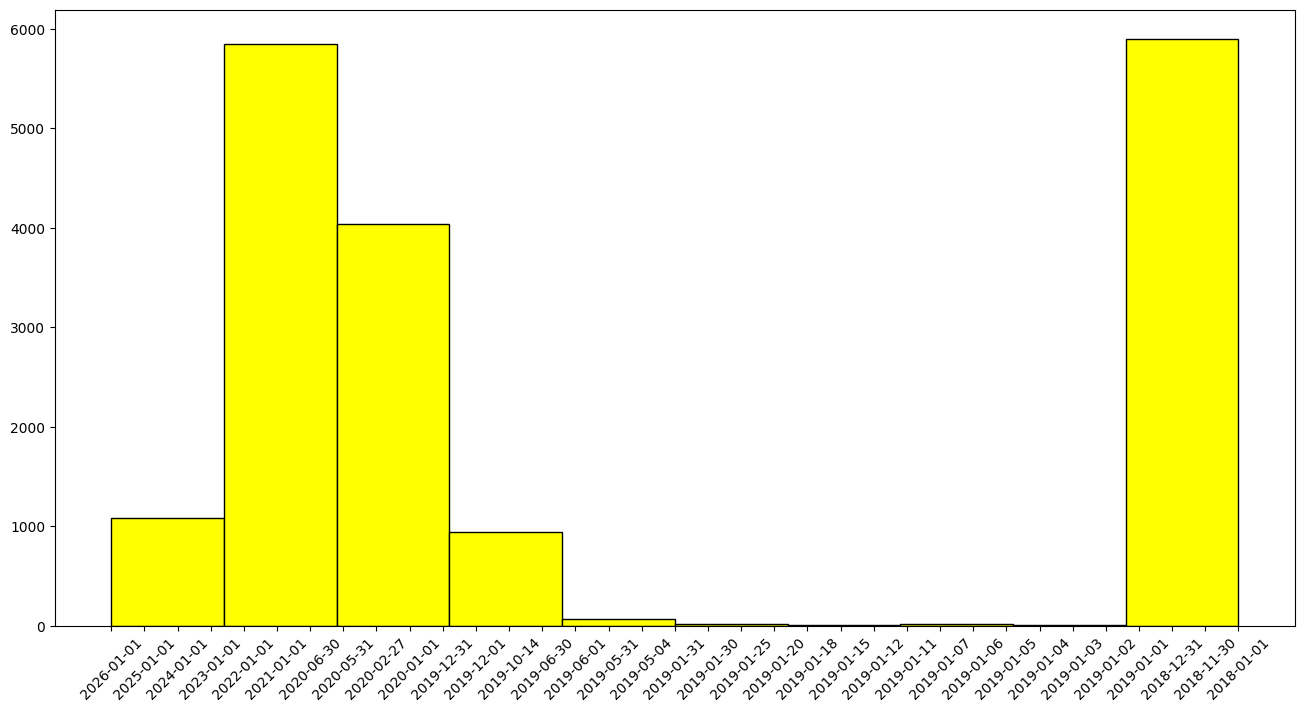

Therefore, the Contract of the most of the players is Valide Until 2019
----------------------------------------------------------------------


In [21]:
plt.figure(figsize=(16,8))
plt.hist(df["Contract Valid Until"].sort_values(ascending=False), color="yellow", edgecolor="black")
plt.xticks(rotation = 45)
plt.show()
print("Therefore, the Contract of the most of the players is Valide Until 2019")
print(70*"-")

### Joined

In [22]:
pd.options.display.float_format = "{:.2f}".format
print(df["Joined"].describe())
print(47*"-")

count   17907.00
mean     2016.43
std         2.03
min      1991.00
25%      2016.00
50%      2017.00
75%      2018.00
max      2018.00
Name: Joined, dtype: float64
-----------------------------------------------


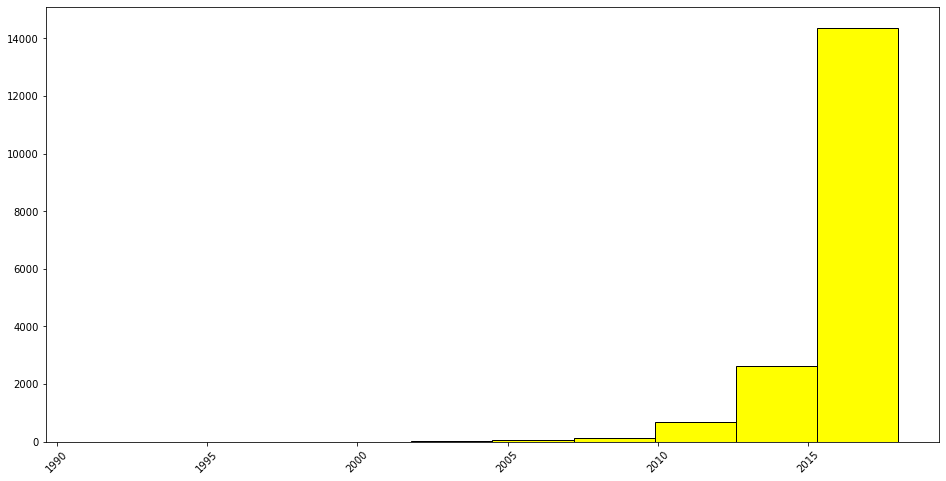

Therefore, most of the players joined their club after 2016
----------------------------------------------------------------------


In [19]:
plt.figure(figsize=(16,8))
plt.hist(df["Joined"].sort_values(ascending=False), color="yellow", edgecolor="black")
plt.xticks(rotation = 45)
plt.show()
print("Therefore, most of the players joined their club after 2016")
print(70*"-")

### Release Clause

In [23]:
pd.options.display.float_format = "{:.2f}".format
print(df["Release Clause"].describe())
print(47*"-")

count    17907.00
mean      4585.06
std      10719.10
min         13.00
25%        563.00
50%       1300.00
75%       4585.06
max     228100.00
Name: Release Clause, dtype: float64
-----------------------------------------------


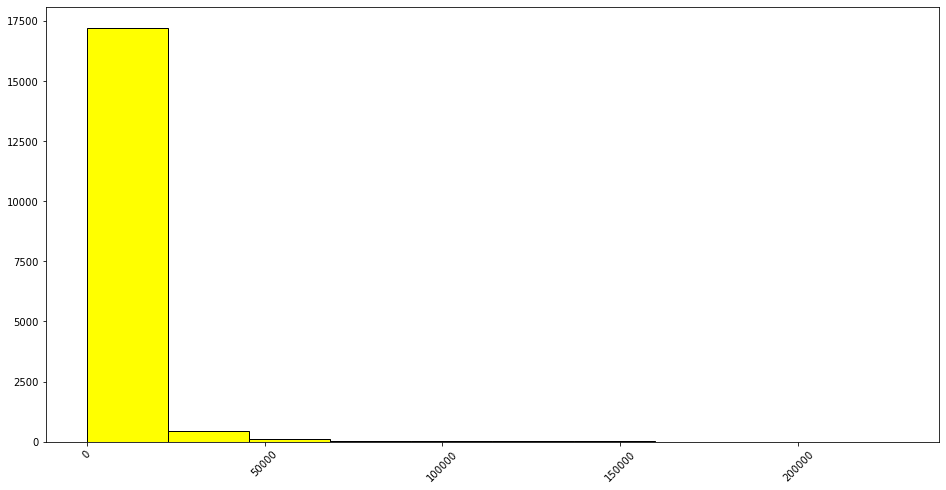

Therefore, the Release Clause of the most of the players is lower than 25000
----------------------------------------------------------------------


In [21]:
plt.figure(figsize=(16,8))
plt.hist(df["Release Clause"], color="yellow", edgecolor="black")
plt.xticks(rotation = 45)
plt.show()
print("Therefore, the Release Clause of the most of the players is lower than 25000")
print(70*"-")

### International Reputation

In [24]:
pd.options.display.float_format = "{:.2f}".format
print(df["International Reputation"].describe())
print(47*"-")

count   17907.00
mean        1.11
std         0.40
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         5.00
Name: International Reputation, dtype: float64
-----------------------------------------------


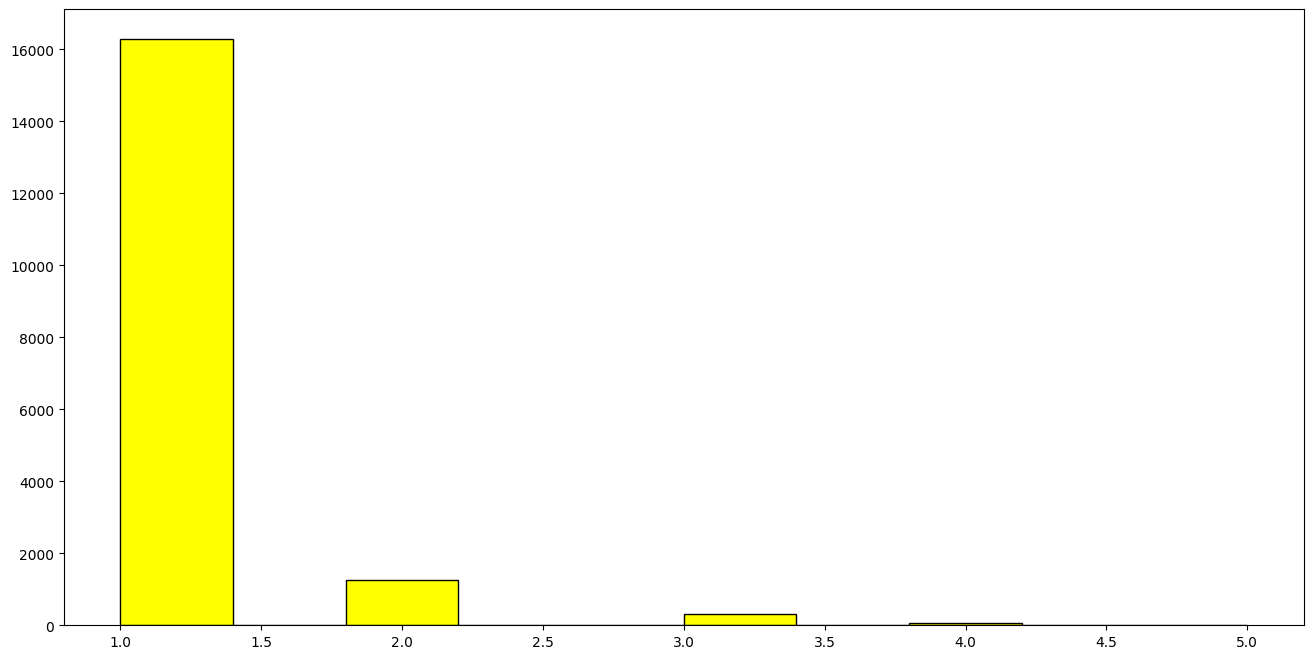

In [25]:
plt.figure(figsize=(16,8))
plt.hist(df["International Reputation"], color="yellow", edgecolor="black")
plt.show()

### Top 10 Countries with the most Football Players

In [26]:
Top10_Countries = df["Nationality"].value_counts().head(10)
print(Top10_Countries)
print(47*"-")

Nationality
England        1655
Germany        1195
Spain          1071
Argentina       935
France          910
Brazil          824
Italy           699
Colombia        615
Japan           475
Netherlands     452
Name: count, dtype: int64
-----------------------------------------------


C:\Users\Zeinab\AppData\Local\Temp\ipykernel_13212\2595351898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top10_Countries.index, y=Top10_Countries.to_list(), palette="magma", edgecolor="black")


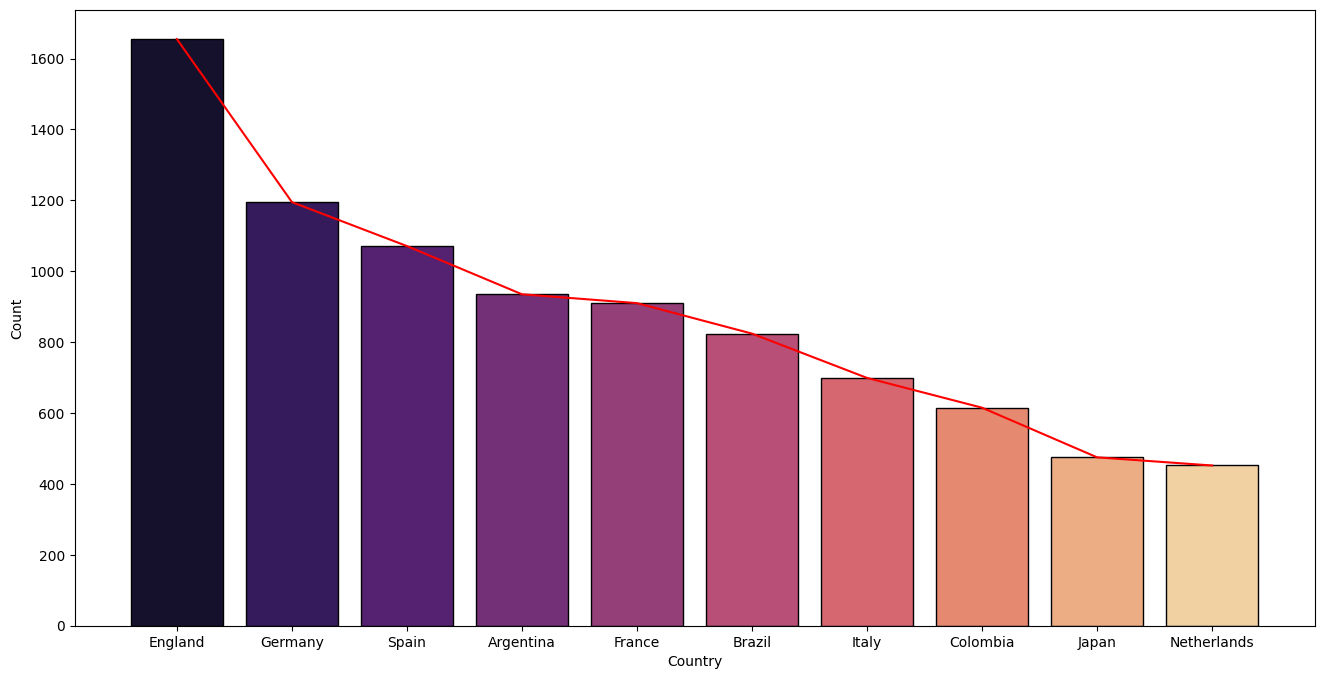

Therefore, most of the players are from England.
---------------------------------------------------------


In [27]:
plt.figure(figsize=(16,8))
sns.barplot(x=Top10_Countries.index, y=Top10_Countries.to_list(), palette="magma", edgecolor="black")
sns.lineplot(x=Top10_Countries.index, y=Top10_Countries.to_list(), color="red")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()
print("Therefore, most of the players are from England.")
print(57*"-")

### Age Distribution

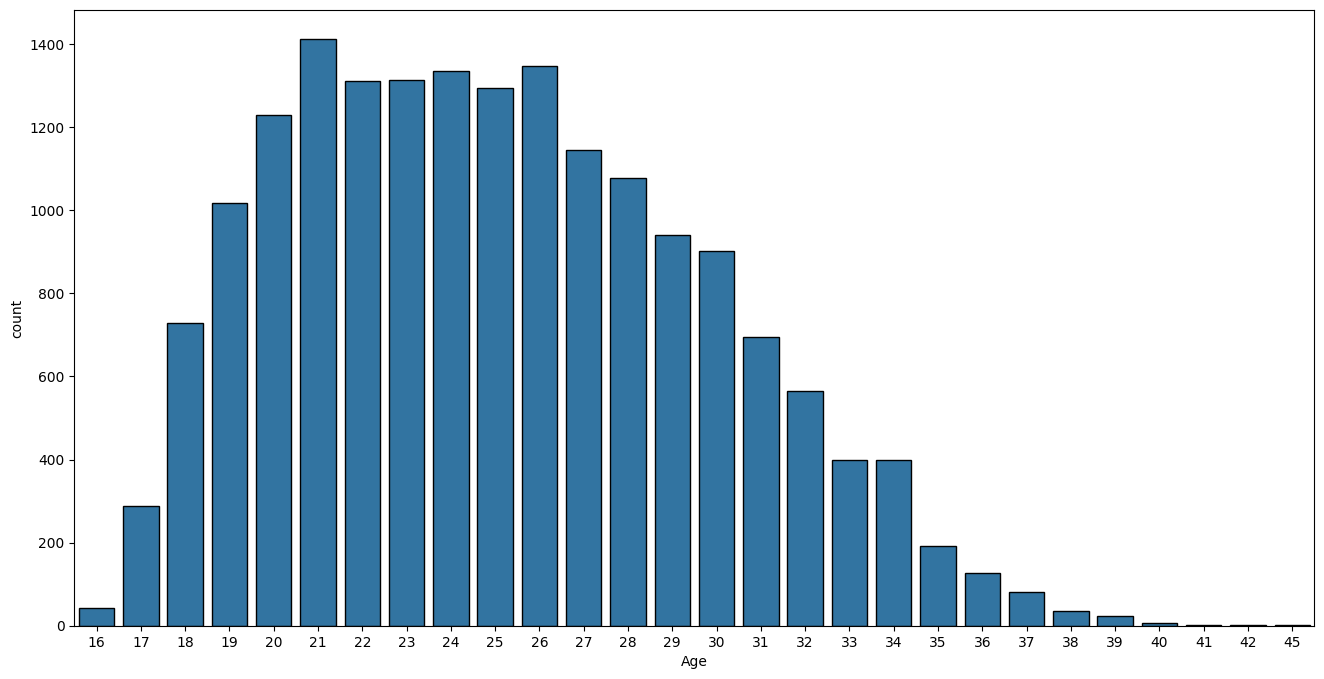

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(x="Age", data=df, edgecolor="black")
plt.show()

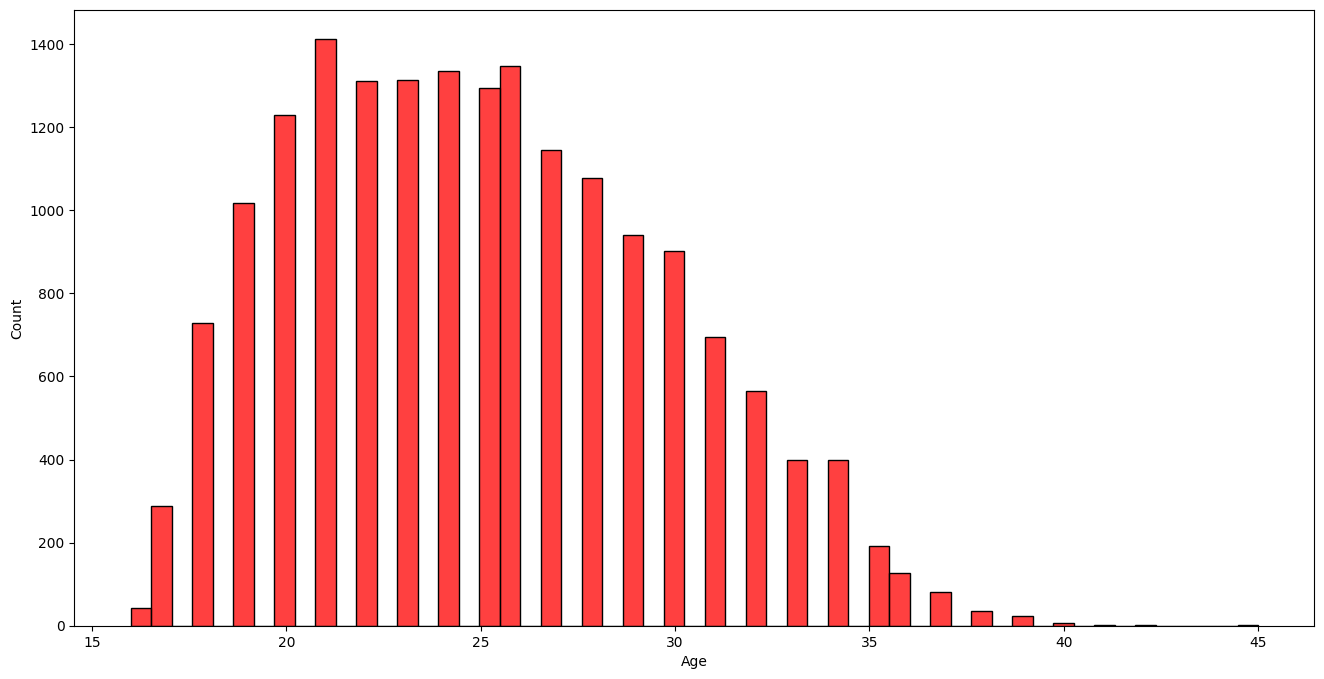

In [29]:
plt.figure(figsize=(16,8))
sns.histplot(x="Age", data=df, color="red", edgecolor="black")
plt.show()

In [30]:
print("Median of attribute age is:", df["Age"].median())
print(57*"-")
print("Therefore, most of the players have age closer to 25.")
print(57*"-")

Median of attribute age is: 25.0
---------------------------------------------------------
Therefore, most of the players have age closer to 25.
---------------------------------------------------------


### Positions and Prefered Foot
#### *GoalKeeper*:
- GK (Goalkeeper)

#### *Defenders*:
- CB (Center Back)
- RB (Right Back)
- LB (Left Back)
- RCB (Right Center Back)
- LCB (Left Center Back)
- RWB (Right Wing Back)
- LWB (Left Wing Back)

#### *Midfielders*:
- CM (Center Midfielder)
- RM (Right Midfielder)
- LM (Left Midfielder)
- RCM (Right Center Midfielder)
- LCM (Left Center Midfielder)
- CDM (Center Defensive Midfielder)
- RDM (Right Defensive Midfielder)    
- LDM (Left Defensive Midfielder) 
- CAM (Center Attacking Midfielder)
- RAM (Right Attacking Midfielder)
- LAM (Left Attacking Midfielder)

#### *Forwards*:
- ST (Striker)
- RS (Right Striker)
- LF (Right Striker)
- CF (Center Forward)
- RF (Right Forward)
- LF (Left Forward)
- RF (Right Wing)
- LF (Left Wing)


#### Most famous Position 

In [31]:
Position = df["Position"].value_counts()
print(Position)
print(47*"-")

Position
ST     2130
GK     1989
CB     1751
CM     1377
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
CDM     936
RCB     652
LCB     635
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64
-----------------------------------------------


C:\Users\Zeinab\AppData\Local\Temp\ipykernel_13212\869361852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position.index, y=position.to_list(), palette="viridis", edgecolor="black")


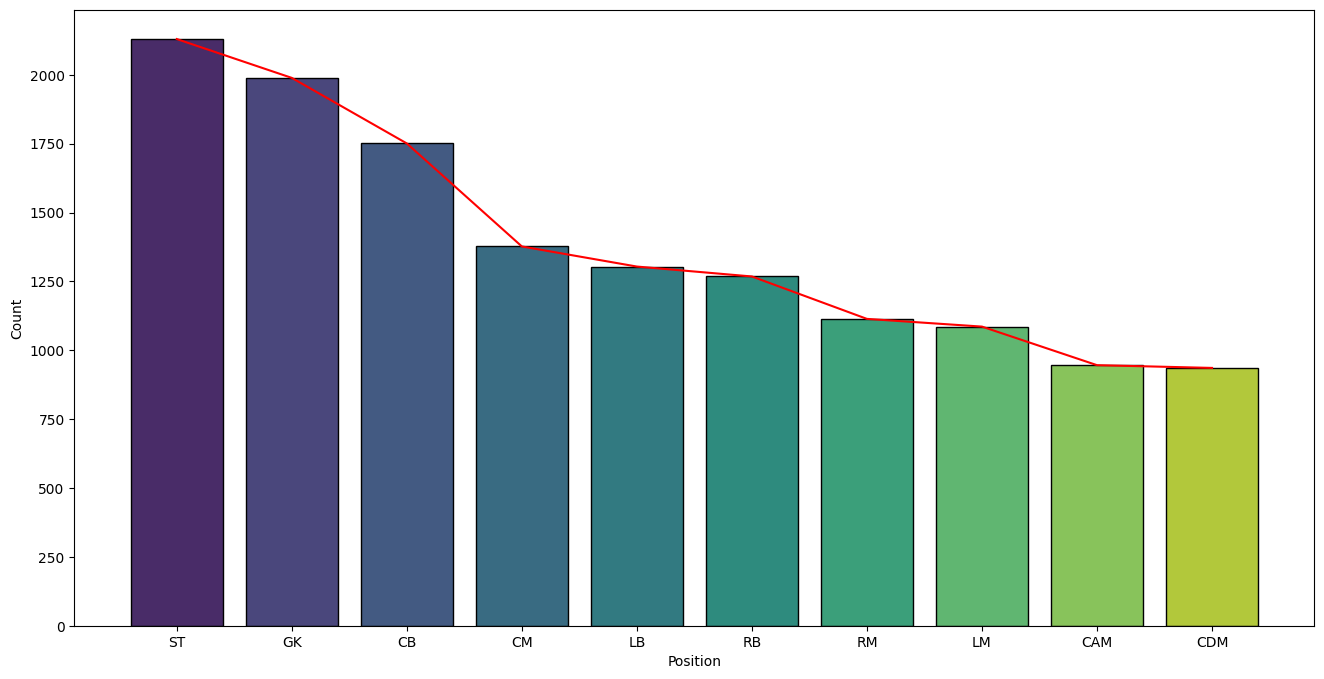

Therefore, The most position played is Striker.
---------------------------------------------------------


In [32]:
plt.figure(figsize=(16,8))
position = df["Position"].value_counts().head(10)
sns.barplot(x=position.index, y=position.to_list(), palette="viridis", edgecolor="black")
sns.lineplot(x=position.index, y=position.to_list(), color="red")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()
print("Therefore, The most position played is Striker.")
print(57*"-")

In [33]:
# 11 general positions
position_map = {
    "RF":"RF",
    "ST":"CF",
    "LW":"LF",
    "RCM":"RM",
    "LF":"LF",
    "RS":"RF",
    "RCB":"CB",
    "LCM":"LM",
    "CB":"CB",
    "LDM":"DM",
    "CAM":"CM",
    "CDM":"DM",
    "LS":"LF",
    "LCB":"CB",
    "RM":"RM",
    "LAM":"LM",
    "LM":"LM",
    "LB":"LB",
    "RDM":"DM",
    "RW":"RF",
    "CM":"CM",
    "RB":"RB",
    "RAM":"RM",
    "CF":"CF",
    "RWB":"RB",
    "LWB":"LB",
    "GK":"GK"
}
df = df.assign(General_Positions = df["Position"].map(position_map))
# 11 general positions
positions = ["GK","CB","LB","RB","DM","CM","LM","RM","CF","LF","RF"]

In [34]:
foot_count = df.groupby("Preferred Foot")["Name"].aggregate("count")
right = foot_count["Right"]
left = foot_count["Left"]
ratio = right/left
print("Preferred Foot Count:")
print("- Right:",right)
print("- Left:",left)
print(70*"-")
print("\nNatural Right-Footed to Left-Footed Ratio:\n- R:L = {r}:{l} = {ratio:.2f}".format(r=right,l=left,ratio=ratio))
print(70*"-")

Preferred Foot Count:
- Right: 13748
- Left: 4159
----------------------------------------------------------------------

Natural Right-Footed to Left-Footed Ratio:
- R:L = 13748:4159 = 3.31
----------------------------------------------------------------------


In [35]:
position_best_foot={}
position_foot = df.groupby(["General_Positions","Preferred Foot"])["Name"].aggregate("count")
for pos in positions:
    position_best_foot[pos]={}
    l = position_foot[pos]["Left"]*ratio
    r = position_foot[pos]["Right"]
    if(r>=l):
        position_best_foot[pos]["Best"]="Right"
        position_best_foot[pos]["Perc"]=r*100/(l+r)
    else:
        position_best_foot[pos]["Best"]="Left"
        position_best_foot[pos]["Perc"]=l*100/(l+r)
        
position_rating = df.groupby("General_Positions")["Overall"].aggregate("mean")
position_rating = position_rating.to_dict()

position_age = df.groupby("General_Positions")["Age"].aggregate("mean")
position_age = position_age.to_dict()

position_value = df.groupby("General_Positions")["Value"].aggregate("mean")
position_value = position_value.to_dict()

mid_x=530
mid_y=800
position_loc={
    "GK":[[mid_x,mid_y*12/7],"yellow"],
    "RB":[[mid_x*6/4,mid_y*10/7],"cyan"],
    "LB":[[mid_x*2/4,mid_y*10/7],"cyan"],
    "CB":[[mid_x,mid_y*10/7],"cyan"],
    "DM":[[mid_x,mid_y*8/7],"lime"],
    "RM":[[mid_x*6/4,mid_y*6/7],"lime"],
    "LM":[[mid_x*2/4,mid_y*6/7],"lime"],
    "CM":[[mid_x,mid_y*4/7],"lime"],
    "RF":[[mid_x*6/4,mid_y*2/7],"tomato"],
    "LF":[[mid_x*2/4,mid_y*2/7],"tomato"],
    "CF":[[mid_x,mid_y*2/7],"tomato"]
}

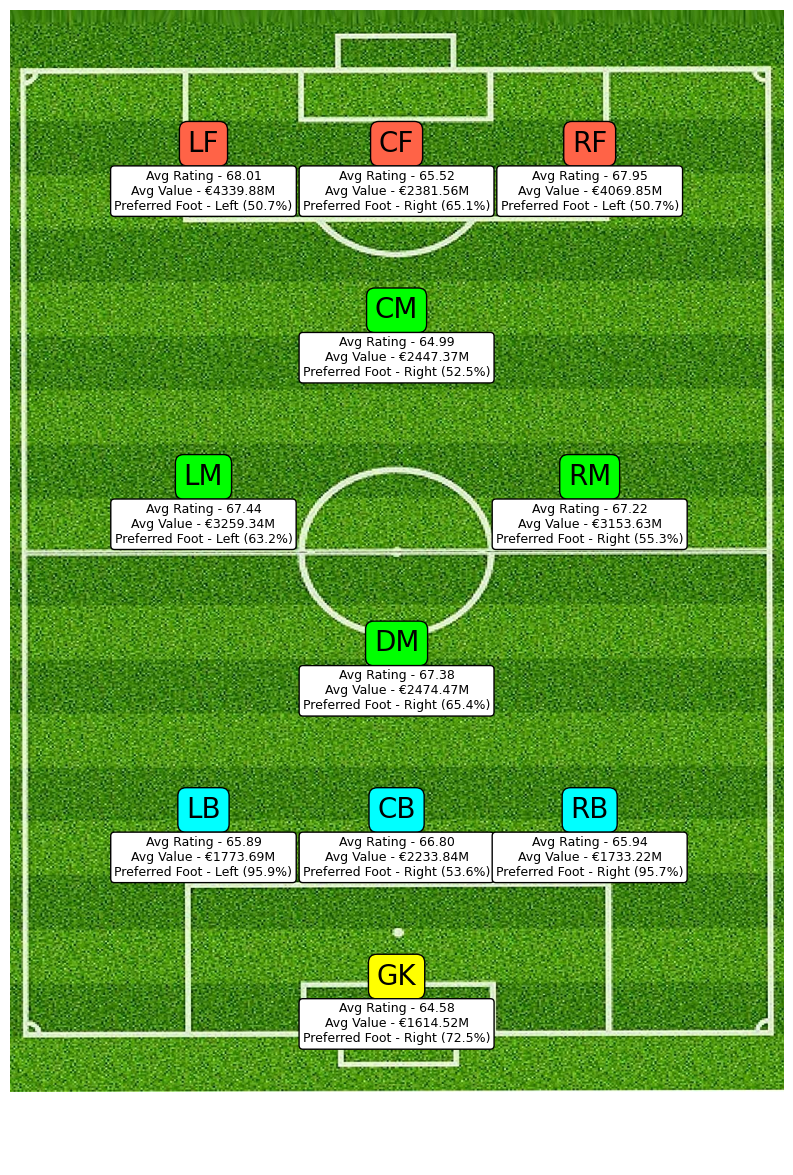

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (10, 15))
pitch_img = plt.imread(r"C:\Users\Zeinab\Desktop\Exploratory Data Analysis\IBM_Course_Project\football-pitch.jpg")
ax.imshow(pitch_img)
for pos in positions:
    loc = position_loc[pos][0]
    color = position_loc[pos][1]
    ax.plot(loc[0],loc[1],"o",color=color,markersize=25)
    rating = position_rating[pos]
    age = position_age[pos]
    value = position_value[pos]
    foot = position_best_foot[pos]["Best"]
    foot_perc = position_best_foot[pos]["Perc"]
    ax.annotate(pos,(loc[0],loc[1]-30),fontsize=20,va="center",ha="center",
                bbox=dict(boxstyle="round",fc=color))
    info="Avg Rating - {rat:.2f}\nAvg Value - €{val:.2f}M\nPreferred Foot - {ft} ({ft_perc:.1f}%)".format(
    rat=rating,val=value,ft=foot,ft_perc=foot_perc)
    ax.annotate(info,(loc[0],loc[1]+35),fontsize=9,va="center",ha="center",bbox=dict(boxstyle="round",fc="w"))
plt.axis("off")
ax.set_ylim(2*mid_y,15)
plt.show()

#### *Figure Analysis*:
Looking at the figure above, first thing to notice is Average Rating, which is the lowest for a Goalkeeper. 
After that, we see Average Value which is the highest for Side Forwards and this shows these players are the most expensive. 
On the other hand, Defenders and Goalkeepers are much cheaper. 
The last feature to notice, is Preferred Foot, which is calculated through natural ratio of right-footed to left-footed footballers. Therefore, it is only normal that the right-footed players are almost three times more than left-footed players.  


#### Players' Preferred Foot 

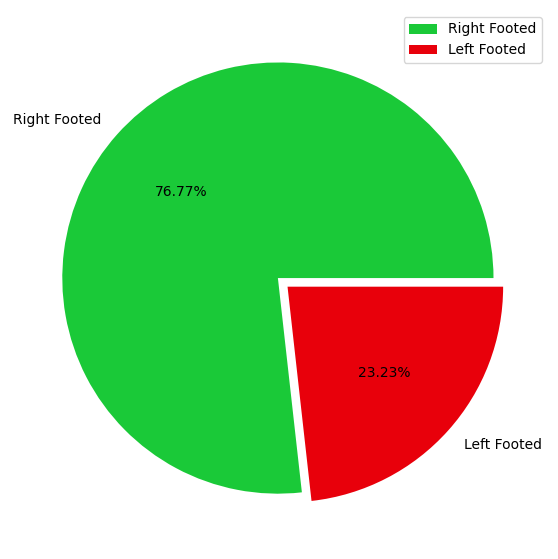

Therefore, most of the players prefer their right foot.
---------------------------------------------------------


In [39]:
plt.subplots(figsize=(7,7))
colors = sns.color_palette("bright")[2:6]
plt.pie(df["Preferred Foot"].value_counts(), labels=["Right Footed","Left Footed"], autopct="%1.2f%%", colors=colors, explode=[0.01,0.05])
plt.legend()
plt.show()
print("Therefore, most of the players prefer their right foot.")
print(57*"-")

### Wage - Highest paid players

In [40]:
Highest_Wage = df["Wage"].sort_values(ascending=False).head(10)
print(Highest_Wage)
print(47*"-")
H_W_Players = df.iloc[Highest_Wage.index].Name
print(H_W_Players)
print(47*"-")

0    565.00
7    455.00
6    420.00
1    405.00
8    380.00
36   355.00
11   355.00
4    355.00
5    340.00
32   340.00
Name: Wage, dtype: float64
-----------------------------------------------
0              L. Messi
7             L. Suárez
6             L. Modrić
1     Cristiano Ronaldo
8          Sergio Ramos
36              G. Bale
11             T. Kroos
4          K. De Bruyne
5             E. Hazard
32             Coutinho
Name: Name, dtype: object
-----------------------------------------------


C:\Users\Zeinab\AppData\Local\Temp\ipykernel_13212\259772417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=H_W_Players, y=Highest_Wage, palette="PuBuGn_d", edgecolor="black")


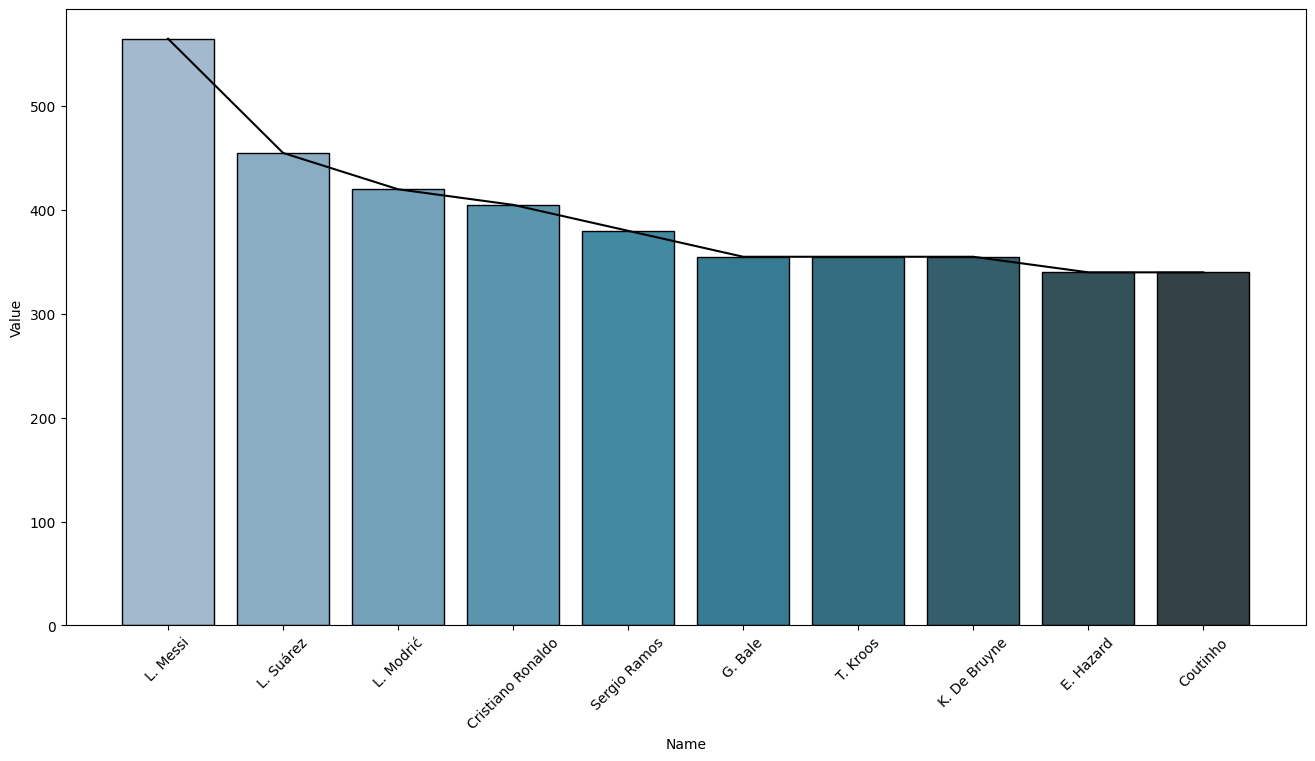

Therefore, Messi is the highest paid player.
---------------------------------------------------------


In [41]:
plt.figure(figsize=(16,8))
sns.barplot(x=H_W_Players, y=Highest_Wage, palette="PuBuGn_d", edgecolor="black")
sns.lineplot(x=H_W_Players, y=Highest_Wage, color="black")
plt.xlabel("Name")
plt.ylabel("Value")
plt.xticks(rotation = 45)
plt.show()
print("Therefore, Messi is the highest paid player.")
print(57*"-")

### Barcelona vs Real Madrid (min,q1,median,q3,max value)

In [47]:
team1 = df[df.Club == "FC Barcelona"].Overall
team2 = df[df.Club == "Real Madrid"].Overall
fig = go.Figure()
fig.add_trace(go.Box(y=team1, name="FC Barcelona", marker = {"color" : "greenyellow"}))
fig.add_trace(go.Box(y=team2, name="Real Madrid", marker = {"color" : "cyan"}))
fig.show()

### Teams with Highest & Lowest Average Potential

In [48]:
def plot_club_stats(col, title, df=df, space=4, main_col="Club"):
    club_val = df.groupby([main_col])[col].aggregate("mean")
    low_club_val = club_val.sort_values()[:15]
    high_club_val = club_val.sort_values(ascending=False)[:15]

    avg_club_val = np.mean(df[col])
    q1_club_val = np.quantile(df[col], 0.25)
    q3_club_val = np.quantile(df[col], 0.75)

    fig,ax = plt.subplots(1, 1, figsize=(16,8))
    x1_labels = list(low_club_val.keys())
    x1 = np.arange(len(x1_labels))
    y1 = list(low_club_val.values)
    x2_labels = list(high_club_val.keys())
    x2 = np.arange(len(x2_labels))
    y2 = list(high_club_val.values)

    sns.pointplot(x=x1, y=y1, ax=ax, color="red")
    for ind,(x,y) in enumerate(zip(x1,y1)):
        ax.annotate(
            x1_labels[ind], (x,y), (x,y), rotation=45,
            bbox = dict(boxstyle="round", fc="w"), va="center", ha="center", fontsize=15)
    sns.pointplot(x=x2, y=y2, ax=ax, color="green")
    for ind,(x,y) in enumerate(zip(x2,y2)):
        ax.annotate(
            x2_labels[ind], (x,y), (x,y), rotation=45,
            bbox = dict(boxstyle="round", fc="w"), va="center", ha="center", fontsize=15)

    ax.axhline(avg_club_val)
    ax.annotate("Mean", (-1,avg_club_val), fontsize=15, va="bottom", ha="center")
    ax.axhline(q1_club_val)
    ax.annotate("25% Percentile", (-1,q1_club_val), fontsize=15, va="bottom", ha="center")
    ax.axhline(q3_club_val)
    ax.annotate("75% Percentile", (-1,q3_club_val), fontsize=15, va="bottom", ha="center")

    plt.title("Teams with Highest & Lowest Average " + title, fontsize=20)
    plt.ylabel("Average " + title, fontsize=15)
    plt.ylim(min(y1)-space, max(y2) + space)
    plt.xlim(-2, len(x1)-0.5)
    ax.set_xticklabels("")
    plt.show() 

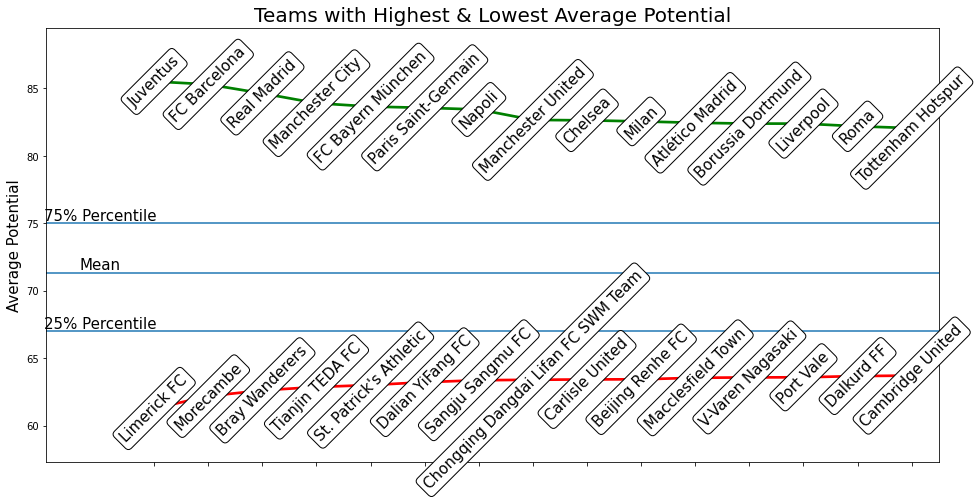

In [40]:
plot_club_stats("Potential", "Potential")

## <font color=Red> 5. Formulating at least 3 hypothesis about this data </font>

### <font color=lime>First Hypothesis</font>
### <font color=lime>
---
</font>

- #### ***H0 = Null Hypothesis:***
    There is no linear relationship between the Age and Wage.

- #### ***H1 = Alternative Hypothesis:***
    here is a linear relationship between the Age and Wage.


### <font color=lime>Second Hypothesis</font>
### <font color=lime>
---
</font>

- #### ***H0 = Null Hypothesis:***
    There is no relationship between the Posistion of the players and  their Wages.

- #### ***H1 = Alternative Hypothesis:***
    It seems that there is a relationship between the Posistion of the players and their Wages.



### <font color=lime>Third hypothesis</font>
### <font color=lime>
---
</font>

- #### ***H0 = Null Hypothesis:***
    There is no relationship between the highest paid players and their wages.

- #### ***H1 = Alternative Hypothesis:***
    There is a relationship between the highest paid players and their wages.


## <font color=Red> 6. Conducting a formal significance test for one of the hypotheses </font>

### *Take into consideration that,*
- ### Here we performe bivariate analysis which is studying the relationship between any two variables. 
- ### It is of three types:
    - #### Numerical and numerical  ✔️
        - For this, we can plot a scatterplot, and also we would calculate covariance.
    - #### Categorical and categorical 
        - For two categorical variables we plot mosaic plots, two-way table, and stacked column charts.
    - #### Numerical and categorical
        - For this, we can make box plots, and also run some tests such as Z-Test and T-Test

### *Formal Significant Test for the First Hypothesis*

- #### **H0:**
    There is no linear relationship between the Age and Wage.

- #### **H1:**
    There is a linear relationship between the Age and Wage.


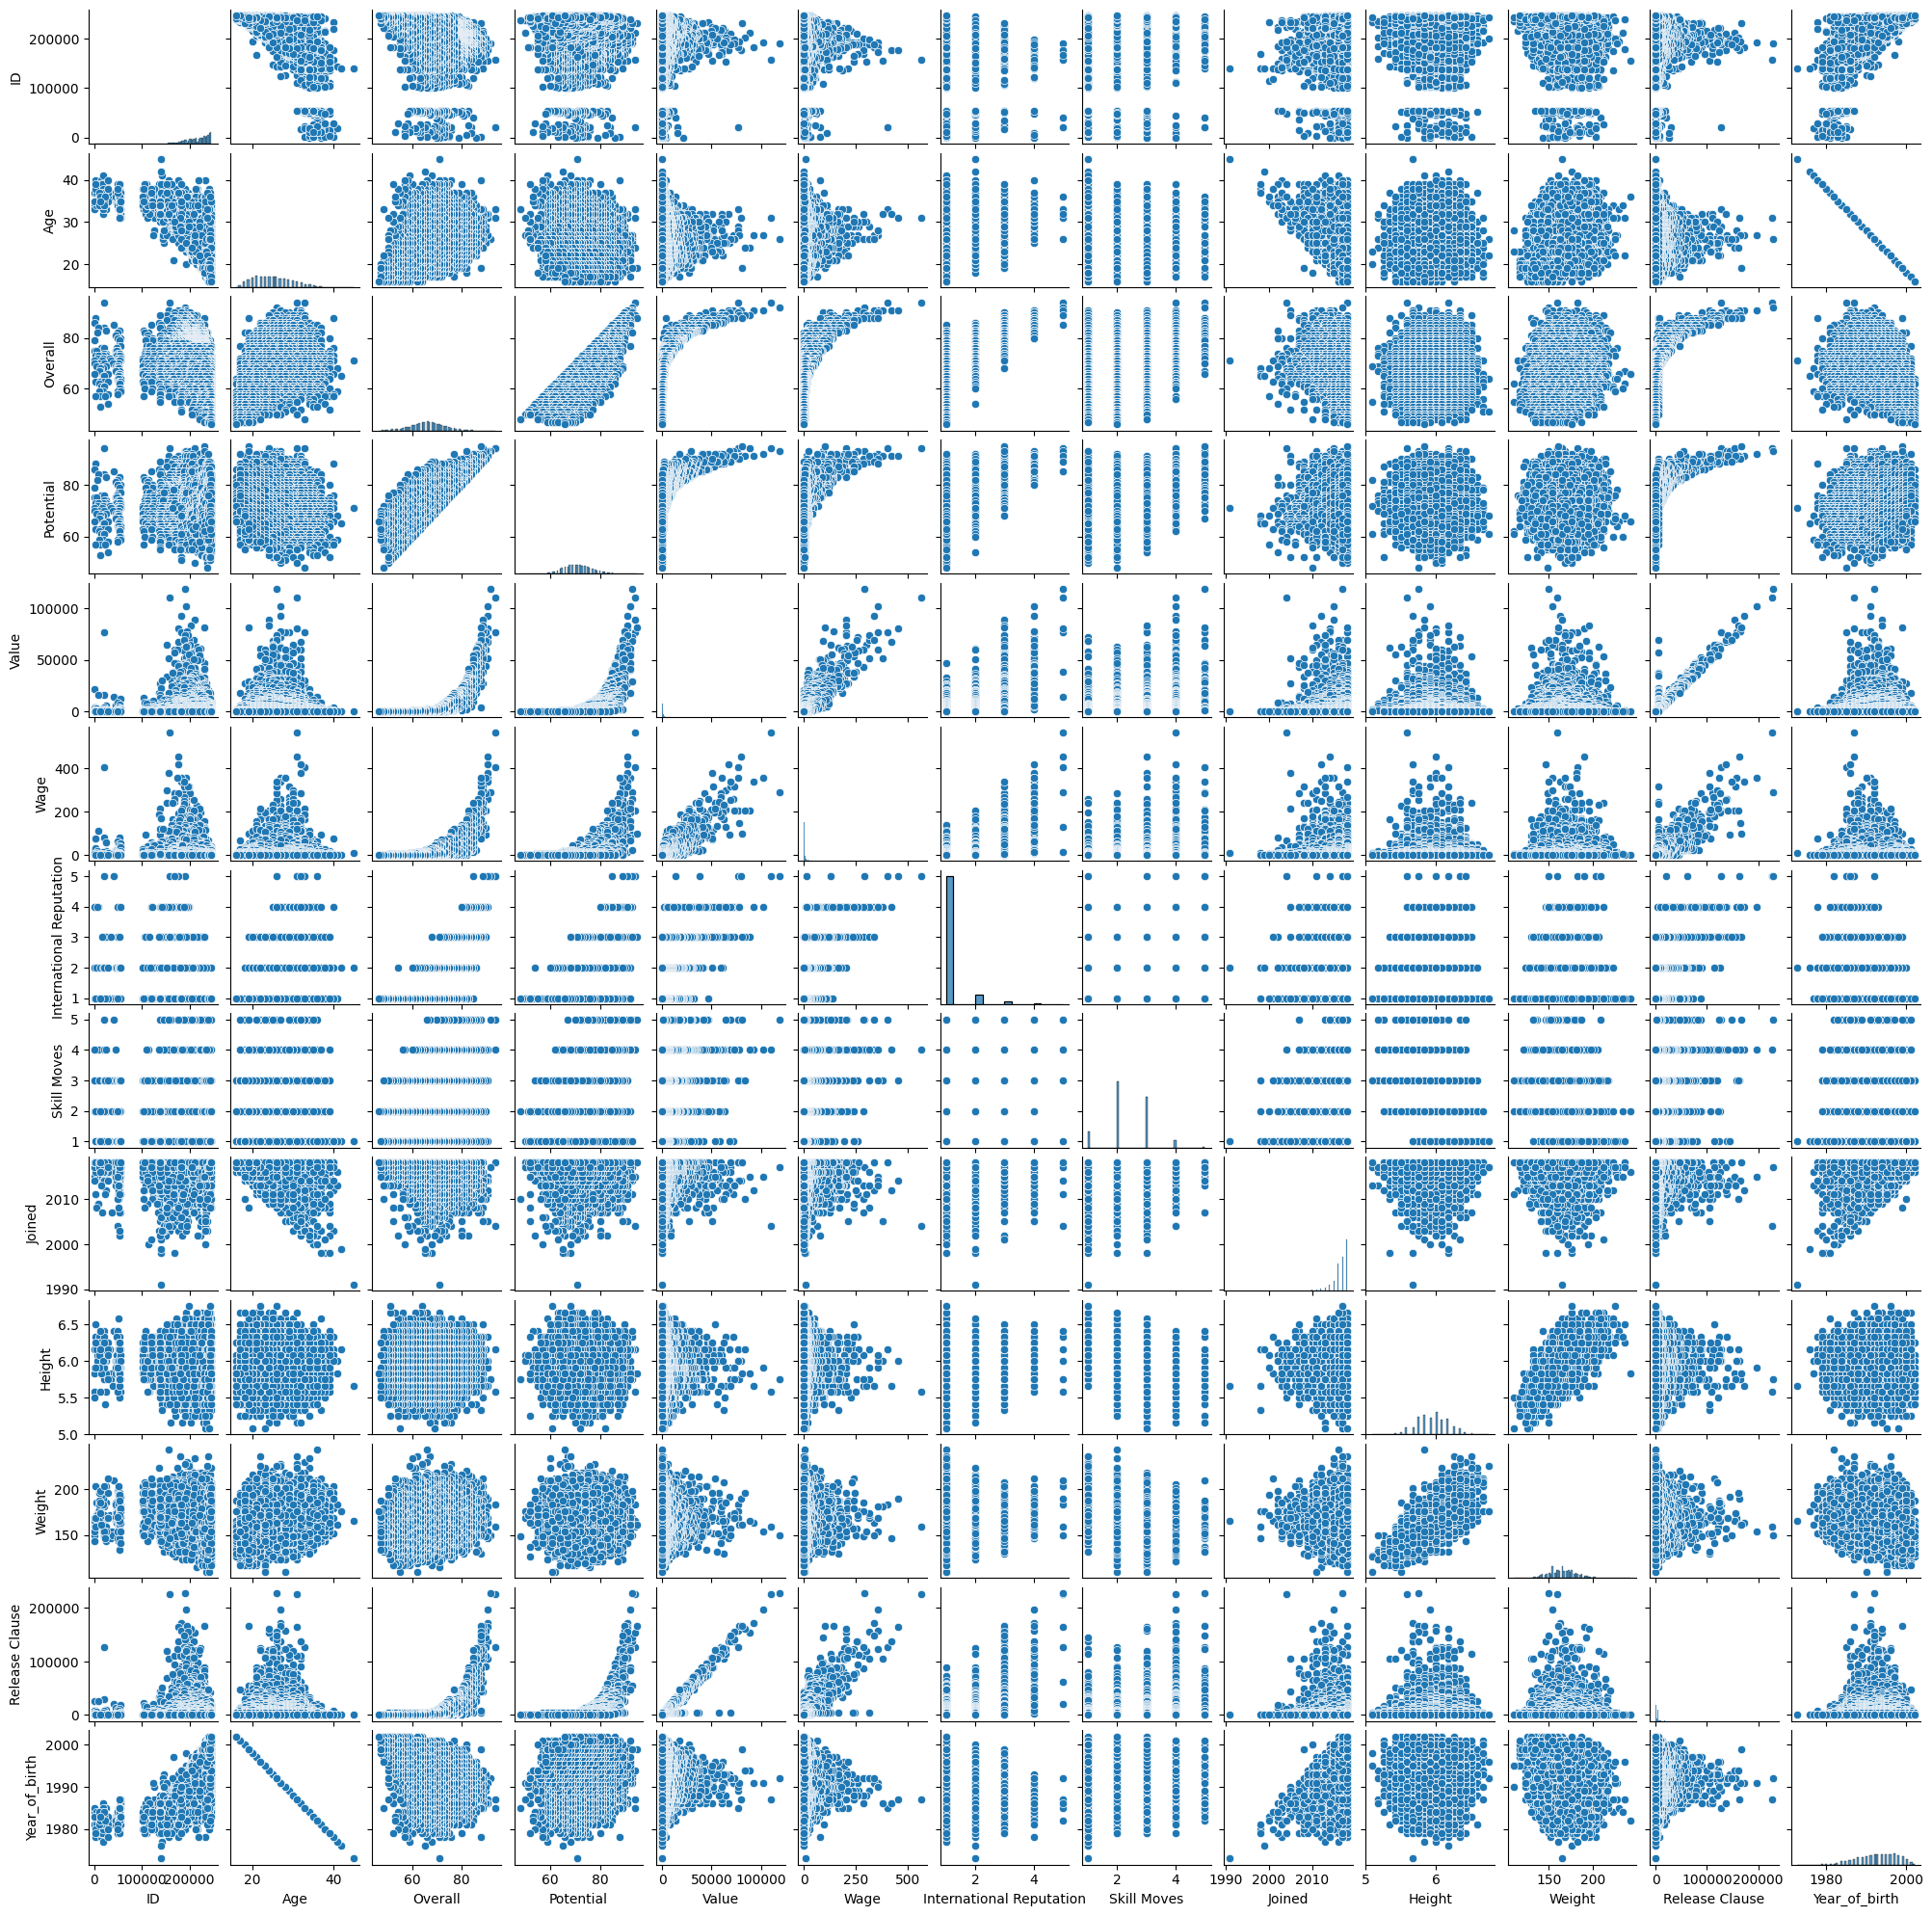

In [49]:
g = sns.pairplot(df)
g.fig.set_size_inches(20,20)

In [50]:
numerical = df.select_dtypes(include=["int64","float64","Int64"])[:]
numerical.dtypes

ID                            int64
Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
International Reputation    float64
Skill Moves                 float64
Joined                        int64
Height                      float64
Weight                      float64
Release Clause              float64
Year_of_birth                 int64
dtype: object

In [51]:
correlation = numerical.corr()
correlation

ID   Age  Overall  Potential  Value  Wage  \
ID                        1.00 -0.74    -0.42       0.04  -0.14 -0.21   
Age                      -0.74  1.00     0.46      -0.25   0.08  0.15   
Overall                  -0.42  0.46     1.00       0.66   0.63  0.58   
Potential                 0.04 -0.25     0.66       1.00   0.58  0.49   
Value                    -0.14  0.08     0.63       0.58   1.00  0.86   
Wage                     -0.21  0.15     0.58       0.49   0.86  1.00   
International Reputation -0.36  0.25     0.50       0.37   0.66  0.67   
Skill Moves              -0.06  0.03     0.42       0.35   0.32  0.26   
Joined                    0.21 -0.20    -0.17      -0.05  -0.12 -0.14   
Height                   -0.09  0.08     0.04      -0.01   0.00  0.02   
Weight                   -0.19  0.23     0.15      -0.01   0.05  0.07   
Release Clause           -0.12  0.06     0.60       0.57   0.97  0.83   
Year_of_birth             0.74 -1.00    -0.46       0.25  -0.08 -0.15   

                          International Reputation  Skill Moves  Joined  \
ID                                           -0.36        -0.06    0.21   
Age                                           0.25         0.03   -0.20   
Overall                                       0.50         0.42   -0.17   
Potential                                     0.37         0.35   -0.05   
Value                                         0.66         0.32   -0.12   
Wage                                          0.67         0.26   -0.14   
International Reputation                      1.00         0.21   -0.13   
Skill Moves                                   0.21         1.00    0.02   
Joined                                       -0.13         0.02    1.00   
Height                                        0.04        -0.42    0.00   
Weight                                        0.09        -0.35   -0.03   
Release Clause                                0.62         0.30   -0.12   
Year_of_birth                                -0.25        -0.03    0.20   

                          Height  Weight  Release Clause  Year_of_birth  
ID                         -0.09   -0.19           -0.12           0.74  
Age                         0.08    0.23            0.06          -1.00  
Overall                     0.04    0.15            0.60          -0.46  
Potential                  -0.01   -0.01            0.57           0.25  
Value                       0.00    0.05            0.97          -0.08  
Wage                        0.02    0.07            0.83          -0.15  
International Reputation    0.04    0.09            0.62          -0.25  
Skill Moves                -0.42   -0.35            0.30          -0.03  
Joined                      0.00   -0.03           -0.12           0.20  
Height                      1.00    0.75            0.00          -0.08  
Weight                      0.75    1.00            0.04          -0.23  
Release Clause              0.00    0.04            1.00          -0.06  
Year_of_birth              -0.08   -0.23           -0.06           1.00

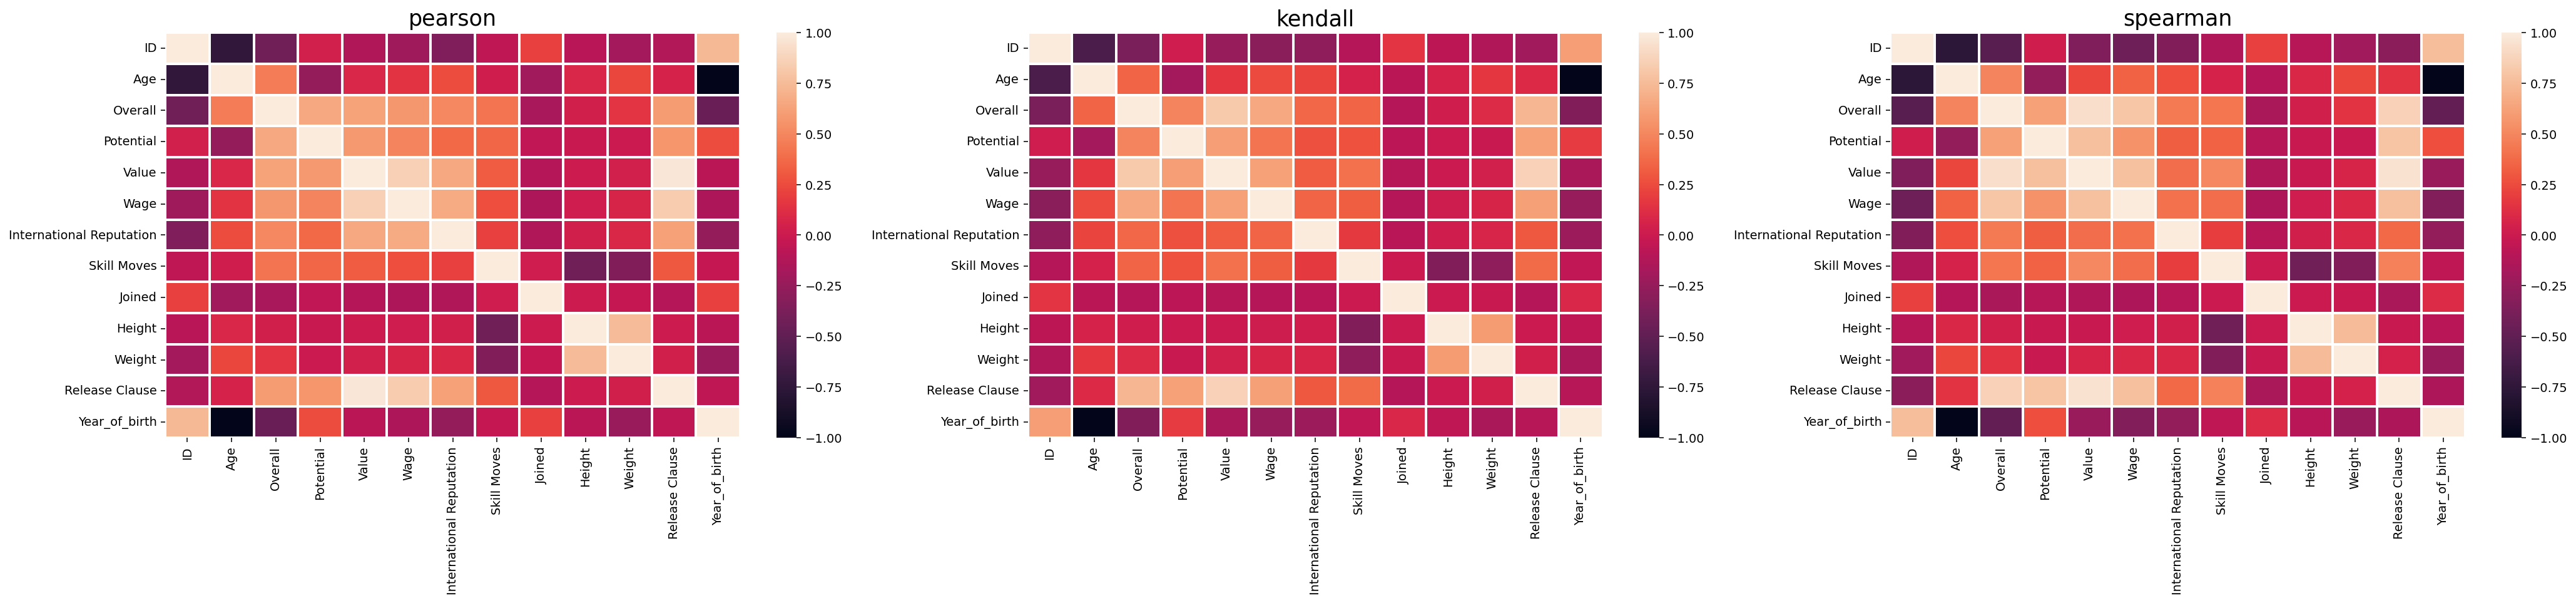

In [52]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(["pearson","kendall","spearman"]):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

### *Result*

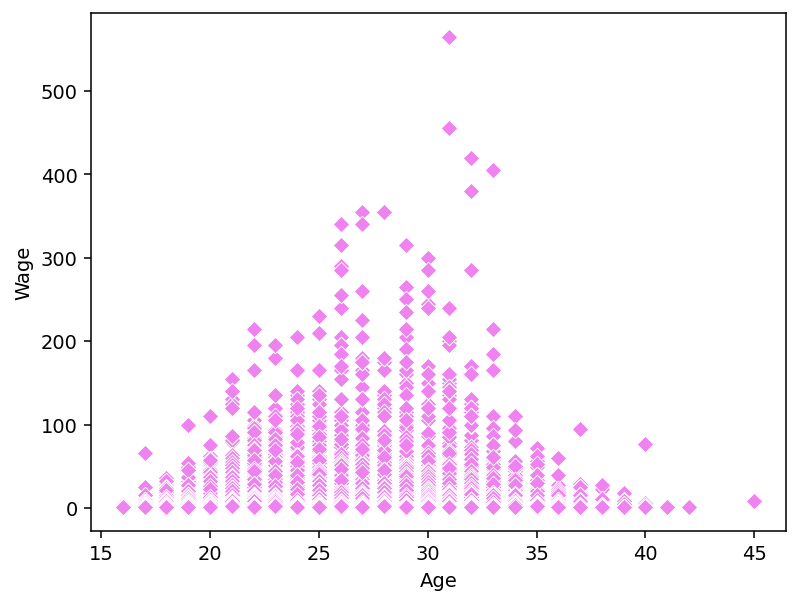

In [53]:
x = numerical["Age"]
y = numerical["Wage"]
plt.figure(dpi=140)
sns.scatterplot(x=x, y=y, color="violet", marker="D")
plt.show()

### *Inference*

- This validates the moderate correlation between the two variables, Age and Wage. In other words, with the increase in the variable Age, the Wage variable does not increase in a linear manner. Therefore, the Null Hypothesis(H0) is true and this results in H1 being rejected. Null Hypothesis (H0) is therefore accepted. 

## <font color=Red> 7. Suggestions for next steps in analyzing this data <font>

- Conducting a Heatmap to visualize the correlation between different features
- Conducting Charts with multiple variables to find more correlations
- Creating models to uncover which feature is attributed most

## <font color=Red> 8. Quality of this dataset </font>

FIFA19 contains few null values and almost the minimum amount of features. However, in the most recent releases e.g. FIFA 2020s series, more features have been added, making it a dataset of +80 features.
Nevertheless, this dataset has been a great help to Data Scientists in exploring and analyzing such data at that time. 